In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import re
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from pprint import pprint

import src
from src.reload import deep_reload

In [2]:
outline = gpd.read_file('Data/State/tl_2023_us_state.shp')

In [3]:
atlas = src.graph.graph_from_json('atlas.json')

In [21]:
'''
Importing California SNG
'''

graph = src.graph.graph_from_json('Outputs/sng_combined_directed.json')

In [22]:
deep_reload(src)

destinations = [k for k, v in graph._node.items() if v['type'] == 'destination']
stations = [k for k, v in graph._node.items() if v['type'] == 'station']

destinations = src.graph.subgraph(graph, destinations)
stations = src.graph.subgraph(graph, stations)

In [39]:
df_region = df[df['V2ZONEID'].apply(lambda x: any(['CA' in x, 'AZ' in x, 'NV' in x, 'OR' in x]))]

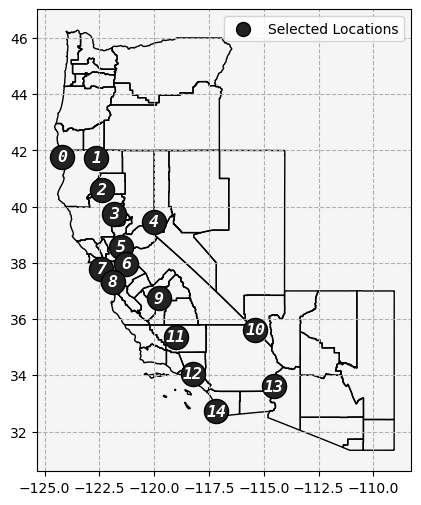

In [40]:
fig, ax = plt.subplots(figsize = (8, 6))

kw = {
    'fc': 'none',
    'ec': 'k',
    'ax': ax,
}

df_region.plot(**kw)

kw = {
    'show_links': False,
    'scatter': {
        's': 300,
        'ec': 'k',
        'fc': '#222222',
        'zorder': 4,
        'label': 'Selected Locations',
    },
}

src.figures.plot_graph(destinations, ax = ax, **kw)

x = [n['x'] for n in destinations._node.values()]
y = [n['y'] for n in destinations._node.values()]
n = [f'{n}' for n in range(destinations.number_of_nodes())]

kw = {
    'zorder': 5,
    'horizontalalignment': 'center',
    'verticalalignment': 'center',
    'fontstyle': 'italic',
    'fontsize': 'large',
    'fontweight': 'bold',
    'fontfamily': 'monospace',
    'color': '#ffffff'
}

for idx in range(len(n)):
    
    ax.text(x[idx], y[idx], n[idx], **kw)

_ = ax.set(**{
    'facecolor': 'whitesmoke',
})

legend = ax.legend(loc = 1)

for h in legend.legendHandles:
    h._sizes = [100]

ax.grid(ls = '--')

<Axes: >

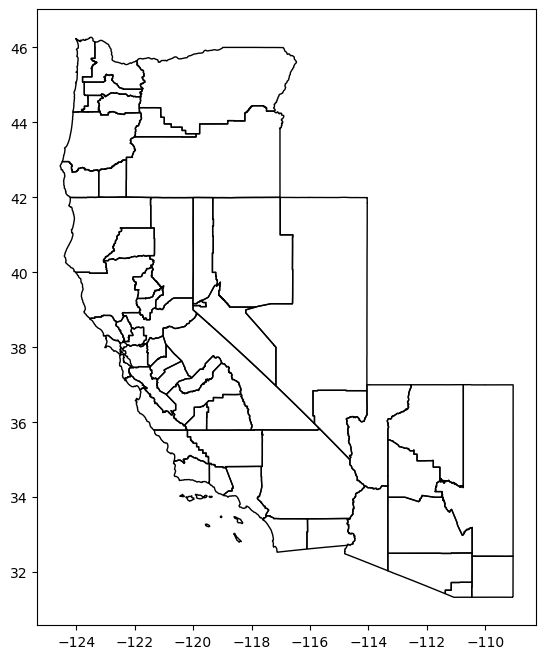

In [28]:
fig, ax = plt.subplots(figsize = (12, 8))

kw = {
    'fc': 'none',
    'ec': 'k',
    'ax': ax,
}

df_cali.plot(**kw)

<Axes: >

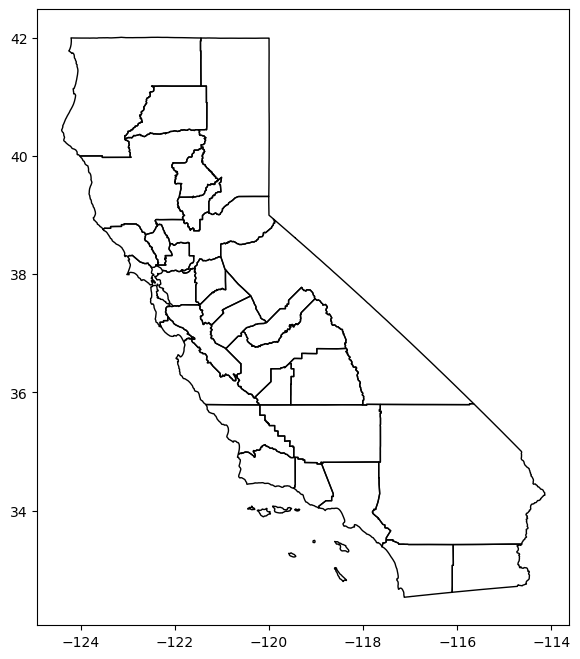

In [30]:
df_cali = df[df['V2ZONEID'].apply(lambda x: any(['CA' in x]))]

fig, ax = plt.subplots(figsize = (12, 8))

kw = {
    'fc': 'none',
    'ec': 'k',
    'ax': ax,
}

df_cali.plot(**kw)

In [36]:
df_names = pd.read_excel('Data/NGOD/2021_Passenger_OD_Annual_Dictionary.xlsx')

In [35]:
df_data = pd.read_csv('Data/NGOD/2021_Passenger_OD_Annual_Data.csv')

In [37]:
df_data

,year,origin_zone_id,destination_zone_id,origin_zone_name,destination_zone_name,origin_state,destination_state,annual_total_trips,mode_air,mode_rail,...,vehicle_gt300mi_pct,atf_0_10mi_pct,atf_10_25mi_pct,atf_25_50mi_pct,atf_50_75mi_pct,atf_75_100mi_pct,atf_100_150mi_pct,atf_150_300mi_pct,atf_gt300mi_pct,flag
0,2021,10180_TX,10180_TX,"Abilene, TX","Abilene, TX",TX,TX,195221742,0,0,...,3.177498e-07,0.995946,0.003034,0.001020,0.0,0.0,0.0,0.0,0.0,0
1,2021,10180_TX,10420_OH,"Abilene, TX","Akron, OH",TX,OH,165,0,0,...,1.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,2021,10180_TX,10500_GA,"Abilene, TX","Albany, GA",TX,GA,31,0,0,...,1.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,2021,10180_TX,10540_OR,"Abilene, TX","Albany, OR",TX,OR,0,0,0,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
4,2021,10180_TX,10580_NY,"Abilene, TX","Albany-Schenectady-Troy, NY",TX,NY,200,0,0,...,1.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339884,2021,RWY3_WY,RWV2_WV,WY-NonMSA areas (SW),WV-NonMSA areas (NW),WY,WV,30,0,0,...,1.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
339885,2021,RWY3_WY,RWV3_WV,WY-NonMSA areas (SW),WV-NonMSA areas (S),WY,WV,0,0,0,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
339886,2021,RWY3_WY,RWY1_WY,WY-NonMSA areas (SW),WY-NonMSA areas (E),WY,WY,243924,0,0,...,1.348177e-01,0.000000,0.289600,0.710400,0.0,0.0,0.0,0.0,0.0,0
339887,2021,RWY3_WY,RWY2_WY,WY-NonMSA areas (SW),WY-NonMSA areas (NW),WY,WY,957833,40,0,...,6.441163e-03,0.062282,0.223017,0.714700,0.0,0.0,0.0,0.0,0.0,0


In [38]:
df_cali.shape

(30, 4)

In [41]:
df_region.shape

(56, 4)

In [42]:
gdf_cousub = gpd.read_file('Data/COUSUB/tl_2023_06_cousub.shp')

In [44]:
gdf_cousub.shape

(404, 17)

<Axes: >

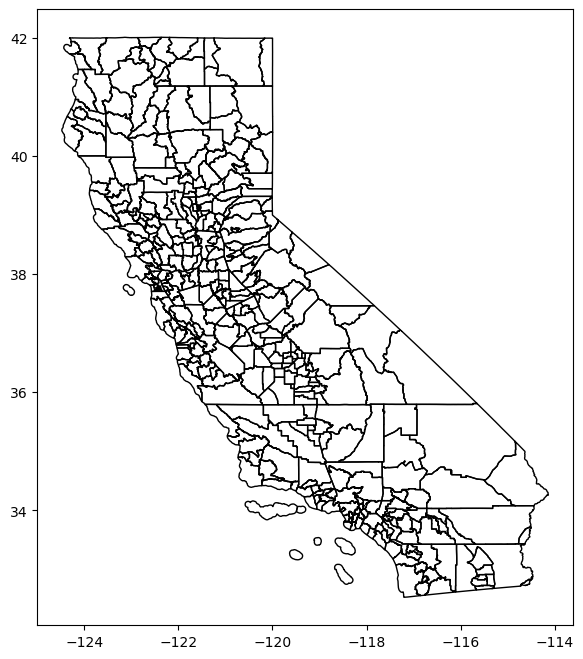

In [43]:
fig, ax = plt.subplots(figsize = (12, 8))

kw = {
    'fc': 'none',
    'ec': 'k',
    'ax': ax,
}

gdf_cousub.plot(**kw)

In [47]:
gdf_cousub.head(5)

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,037,91400,01935145,0603791400,0600000US0603791400,Inglewood,Inglewood CCD,22,Z5,G4040,S,76195310,279918,+33.9222131,-118.3337125,"POLYGON ((-118.37885 33.95437, -118.37883 33.9..."
1,06,037,92110,01935216,0603792110,0600000US0603792110,Newhall,Newhall CCD,22,Z5,G4040,S,1245493664,15989245,+34.5464132,-118.5636638,"POLYGON ((-118.82074 34.66581, -118.82057 34.6..."
2,06,037,93380,01935343,0603793380,0600000US0603793380,Torrance,Torrance CCD,22,Z5,G4040,S,53136568,10607454,+33.8304529,-118.3566183,"POLYGON ((-118.48321 33.80445, -118.48310 33.8..."
3,06,037,92400,01935245,0603792400,0600000US0603792400,Pasadena,Pasadena CCD,22,Z5,G4040,S,140167742,540790,+34.1712391,-118.1498992,"POLYGON ((-118.24875 34.22250, -118.24875 34.2..."
4,06,037,92140,01935219,0603792140,0600000US0603792140,North Antelope Valley,North Antelope Valley CCD,22,Z5,G4040,S,2145086872,12262271,+34.7263064,-118.1775114,"POLYGON ((-118.89447 34.81797, -118.89332 34.8..."


In [6]:
gdf_place = gpd.read_file('Data/Places/tl_2023_06_place.shp')

In [7]:
df_place = pd.read_excel(
    'Data/Places/SUB-IP-EST2022-POP-06.xlsx',
    skiprows = 3, skipfooter = 5,
)
df_place = df_place.rename(columns = {'Unnamed: 0': 'Name', 'Unnamed: 1': 'Base'})

In [8]:
df_place_names = df_place['Name'].to_numpy()
df_place_population = df_place[2022].to_numpy()

In [9]:
gdf_place_names = gdf_place['NAME'].to_numpy()

In [10]:
pop = {}

for name in gdf_place_names:

    for idx, check_name in enumerate(df_place_names):

        if name in check_name:

            pop[name] = df_place_population[idx]
            break

populations = []

for name in gdf_place_names:

    populations.append(pop.get(name, 0))

In [11]:
gdf_place['population'] = populations

In [12]:
gdf_place_sel = gdf_place[gdf_place['population'] > 1e3]
lon, lat = np.array([x.coords.xy for x in gdf_place_sel.geometry.centroid]).T[0]
names = gdf_place_sel['NAME'].to_numpy()
pop = gdf_place_sel['population'].to_numpy()

nodes = []

for idx in range(len(names)):

    node = {
        'id': names[idx],
        'x': lon[idx],
        'y': lat[idx],
        'population': pop[idx],
        'type': 'place',
    }

    nodes.append(node)

links = []

for idx_s in range(len(names)):
    for idx_t in range(len(names)):

        link = {
            'source': names[idx_s],
            'target': names[idx_t],
            'distance': src.utilities.haversine(
                lon[idx_s], lat[idx_s], lon[idx_t], lat[idx_t],
            )
        }

        links.append(link)
    
places = src.graph.graph_from_nlg({'nodes': nodes, 'links': links})

In [13]:
places.number_of_nodes(), places.number_of_edges()

(479, 114960)

In [14]:
for source, adj in places._adj.items():
    for target, edge in adj.items():

        edge['inverse_distance'] = np.exp(-edge['distance'] / 10e3)

c = nx.community.greedy_modularity_communities(
    places, weight = 'inverse_distance', resolution = 1,
)

In [15]:
def graph_from_communities(graph, communities):

    _node = graph._node

    nodes = []

    for idx, community in enumerate(communities):

        x_coordinates = []
        y_coordinates = []
        populations = []

        for source in community:

            x_coordinates.append(_node[source]['x'])
            y_coordinates.append(_node[source]['y'])
            populations.append(_node[source]['population'])

        node = {
            'id': f'community_{idx}',
            'x': np.mean(x_coordinates),
            'y': np.mean(y_coordinates),
            'population': sum(populations),
            'places': [k for k in community],
        }

        nodes.append(node)

    links = []

    return src.graph.graph_from_nlg({'nodes': nodes, 'links': links})

communities = graph_from_communities(places, c)

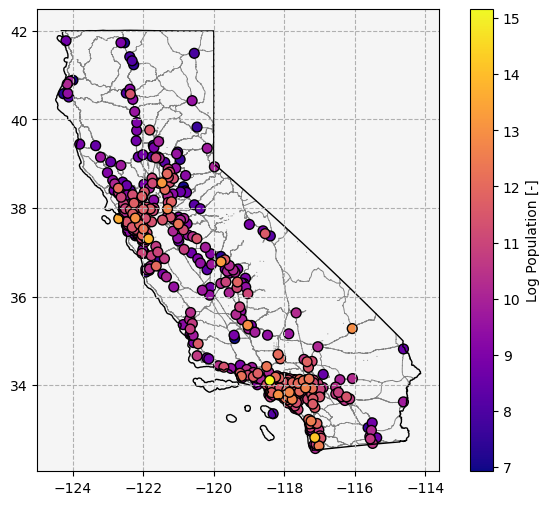

In [30]:
deep_reload(src)

fig, ax = plt.subplots(1, 1, figsize = (8, 6))

for source, node in places._node.items():

    node['log_population'] = np.log(node['population'])

kw = {
    'fc': 'none',
    'ec': 'k',
    'ax': ax,
}

outline[outline['STATEFP'] == '06'].plot(**kw)

kw = {
    'show_links': False,
    'scatter': {
        's': .5,
        'ec': 'none',
        'fc': 'gray',
        'zorder': 0,
    },
}

src.figures.plot_graph(atlas, ax = ax, **kw)

kw = {
    'show_links': False,
    'node_field': 'log_population',
    'cmap': src.figures.colormap(["#ffffff", "#000000"]),
    'cmap': src.figures.colormap('plasma'),
    'scatter': {
        's': 50,
        'ec': 'k',
        'zorder': 0,
        'label': 'Stations',
    },
    'colorbar': {
        'label': 'Log Population [-]',
    },
}

src.figures.plot_graph(
   places, ax = ax, **kw,
)

kw = {
    'facecolor': 'whitesmoke',
}

ax.set(**kw)

kw = {
    'ls': '--',
}

ax.grid(**kw)

fig.savefig(
    'Paper/figs/california_incorporated_places.png', bbox_inches = 'tight', dpi = 300
)

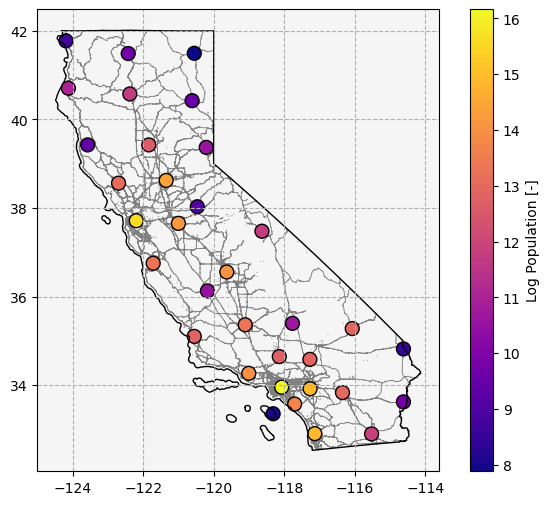

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

for source, node in communities._node.items():

    node['log_population'] = np.log(node['population'])

kw = {
    'fc': 'none',
    'ec': 'k',
    'ax': ax,
}

outline[outline['STATEFP'] == '06'].plot(**kw)

kw = {
    'show_links': False,
    'scatter': {
        's': .5,
        'ec': 'none',
        'fc': 'gray',
        'zorder': 0,
    },
}

src.figures.plot_graph(atlas, ax = ax, **kw)

kw = {
    'show_links': False,
    'node_field': 'log_population',
    'cmap': src.figures.colormap(["#ffffff", "#000000"]),
    'cmap': src.figures.colormap('plasma'),
    'scatter': {
        's': 100,
        'ec': 'k',
        'zorder': 0,
        'label': 'Stations',
    },
    'colorbar': {
        'label': 'Log Population [-]',
    },
}

src.figures.plot_graph(
   communities, ax = ax, **kw,
)

kw = {
    'facecolor': 'whitesmoke',
}

ax.set(**kw)

kw = {
    'ls': '--',
}

ax.grid(**kw)

fig.savefig(
    'Paper/figs/california_incorporated_communities.png', bbox_inches = 'tight', dpi = 300
)